In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math

In [139]:
'''Healthy Food Checker
-A system check to which extent the food product is healthy
- Inputs: Fats (from 0 to 20 grams per 100 gram"
          es number (from 0 to 10, number of elements)
-Output: Healthy% (to which extent the food item is healthy, from 0%(nothealthy) to 100%(healthy))'''

F_class = ctrl.Antecedent(np.arange(0, 21, 1), 'Fats')
F_class['Low'] = fuzz.trimf(F_class.universe, [0, 0, 10])
F_class['Medium'] = fuzz.trimf(F_class.universe, [5, 10, 15])
F_class['High'] = fuzz.trimf(F_class.universe, [10, 20, 20])

E_class = ctrl.Antecedent(np.arange(0,11,1),'Es')
E_class['Low'] = fuzz.trimf(E_class.universe, [0, 0, 4])
E_class['Medium'] = fuzz.trimf(E_class.universe, [3, 5, 7])
E_class['High'] = fuzz.trimf(E_class.universe, [5, 10, 10])   

Healthy =ctrl.Consequent(np.arange(0, 101, 1), 'Healthy')
Healthy['nothealthy'] = fuzz.trimf(Healthy.universe, [0, 0, 40])
Healthy['average'] = fuzz.trimf(Healthy.universe, [30, 50, 70])
Healthy['healthy'] = fuzz.trimf(Healthy.universe, [60, 100, 100])

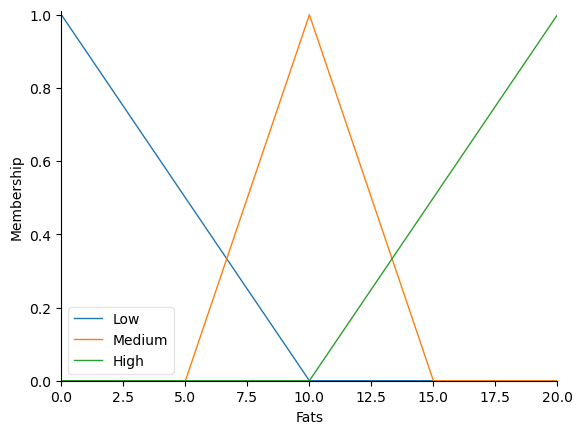

In [141]:
F_class.view()

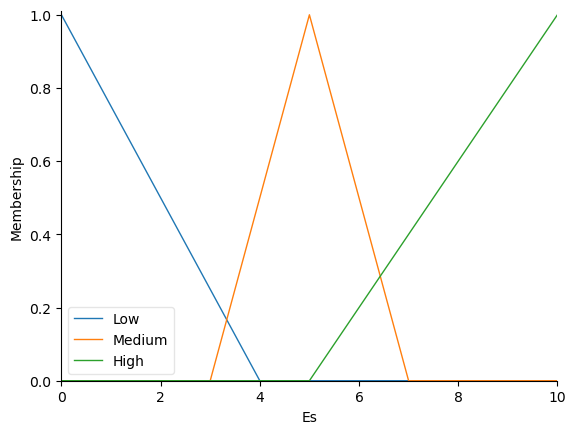

In [143]:
E_class.view()

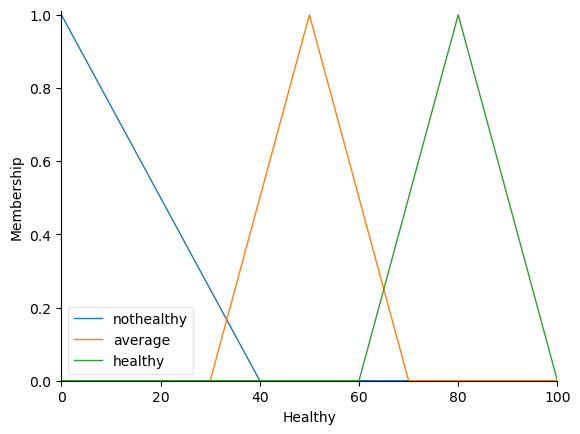

In [145]:
Healthy.view()

In [147]:
'''Define the fuzzy rules'''
#If fats are low and E numbers are low, then the food is healthy.
rule1 = ctrl.Rule((F_class['Low'] & E_class['Low']), Healthy['healthy'])

#If fats are high and E numbers are high, then the food is not healthy.
rule2 = ctrl.Rule((F_class['High'] & E_class['High']), Healthy['nothealthy'])

#If fats are medium and E numbers are low, then the food is average.
rule3 = ctrl.Rule((F_class['Medium'] & E_class['Low']), Healthy['average'])

#If fats are low and E numbers are high, then the food is average.
rule4 = ctrl.Rule((F_class['Low'] & E_class['High']), Healthy['average'])

#If fats are high and E numbers are medium, then the food is not healthy.
rule5 = ctrl.Rule((F_class['High'] & E_class['Medium']), Healthy['nothealthy'])

#If fats are low and E numbers are medium, then the food is healthy.
rule6 = ctrl.Rule((F_class['Low'] & E_class['Medium']), Healthy['healthy'])


In [149]:
'''Control System Creation and Simulation'''
health_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
health_simulation = ctrl.ControlSystemSimulation(health_ctrl)

In [187]:
'''testing with 20 grams of fats and 7 numbers of Es'''
health_simulation.input['Fats'] = 20
health_simulation.input['Es'] = 7

In [189]:
# Compute the result
health_simulation.compute()


In [191]:
print(health_simulation.output['Healthy'])

16.333333333333336


In [193]:
print(health_simulation.input)
print(health_simulation.output)

Fats : 20
Es : 7

{'Healthy': 16.333333333333336}
